# 2.1 Построение модели классификации

## 2.1.1 Разделение признаков на обучающуюся и тестовую

In [24]:
#Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_pickle("habr.pkl")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 0 to 1687
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_company    1688 non-null   object 
 1   rating_company  869 non-null    object 
 2   date_publish    1688 non-null   object 
 3   text            1688 non-null   object 
 4   prep_text2      1688 non-null   object 
 5   prep_text3      1688 non-null   object 
 6   vector          1688 non-null   object 
 7   target          1688 non-null   int64  
 8   date            1688 non-null   object 
 9   reiting         1688 non-null   float64
 10  key_words       1688 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 158.2+ KB


In [31]:
X = df[["name_company", "prep_text2", "reiting"]]
Y = df["target"]

In [32]:
X["prep_text2"] = [" ".join(i) for i in df["prep_text2"]]
    

C:\Users\vbaza\AppData\Local\Temp\ipykernel_17372\2168811981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["prep_text2"] = [" ".join(i) for i in df["prep_text2"]]


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### Обоснование разбиения набора данных: разбиение набора данных на обучающую и тестирующую выборки будут произведенны на основании официального сайта функций машинного обучение - scikit-learn. Данная библиотека предоставляет метод разбиения данных https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html, в котором демонстрируется реккомендуемая выборка 1/3. Данное значение можно обусловить тем, что для обучения требуется больше данных, чем для тестирование. Чтобы, и в тестовой выборке, и в тренеровочной имелись данные для всех регионов, воспользуемся аргументом, shuffle, который распределит данные таким образом, чтобы уникальность значений в каждом из наборов, была максимальна

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X["prep_text2"], Y, test_size=0.33, random_state=42)

## 2.1.2 Выбор метрик

Чтобы определить наилучшую модель можно воспользоваться такими метриками, как `Точность(Accuracy)` , `Отчет(Classification report)`

#### Обоснование выбора данных метрик: данные метрики были выбранны, поскольку они предоставляют всю необходимую информацию для определения наилучшей модели в виде точности, количества ошибок модели и зависимость доли верных положительных классификаций от доли ложных положительных классификаций

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 2.1.3 Выбор методов классификации

`Логистическая регрессия` - метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам



`Дерево принятия решений` - средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение

`MultinomialNB` - это наивный байесовский алгоритм, априор которого является полиномиальным распределением

#### Обоснование выбора данных моделей: данные алгоритмы были выбранны, поскольку они способны быстро работать с большим количеством данных, а также имеют простое концептуальное решение, не требующее особых настроек в параметрах.

# 2.1.4 Обучение

## DecisionTreeClassifier

In [36]:
dtc = Pipeline([("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("dtc", DecisionTreeClassifier())])

In [37]:
dtc.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('dtc', DecisionTreeClassifier())])

In [38]:
y_pred = dtc.predict(X_test)

In [39]:
print(f"accuracy_score = {accuracy_score(y_pred, y_test)}")
print("classification_report:" + classification_report(y_pred, y_test))

accuracy_score = 0.8512544802867383
classification_report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      0.81      0.79       145
           2       0.83      0.92      0.88        65
           3       0.93      0.89      0.91       147
           4       0.98      0.96      0.97        52
           5       0.82      0.83      0.82       141

    accuracy                           0.85       558
   macro avg       0.72      0.74      0.73       558
weighted avg       0.84      0.85      0.85       558



In [40]:
#pip install yellowbrick

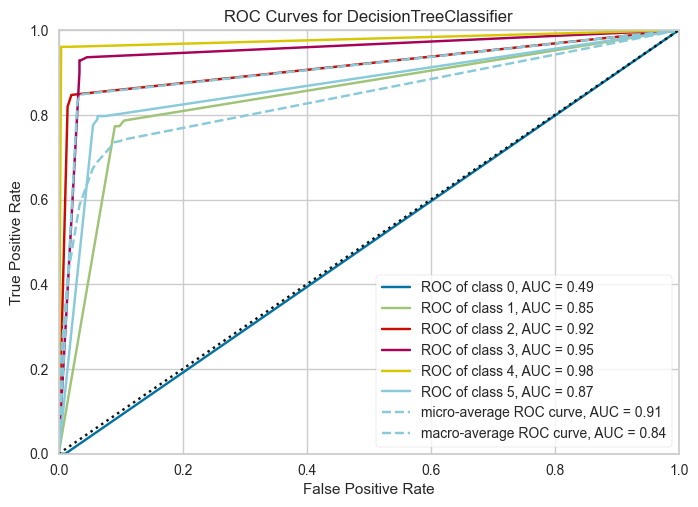

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.features import RadViz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(dtc)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## MultinomialNB

In [107]:
mnb = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("mnb", MultinomialNB())])

In [108]:
mnb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('mnb', MultinomialNB())])

In [109]:
y_pred = mnb.predict(X_test)

In [110]:
print(f"accuracy_score = {accuracy_score(y_pred, y_test)}")
print("classification_report:" + classification_report(y_pred, y_test))

accuracy_score = 0.5555555555555556
classification_report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.44      0.57       264
           2       0.10      1.00      0.18         7
           3       0.74      0.70      0.72       149
           4       0.00      0.00      0.00         0
           5       0.57      0.59      0.58       138

    accuracy                           0.56       558
   macro avg       0.36      0.46      0.34       558
weighted avg       0.71      0.56      0.61       558



C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


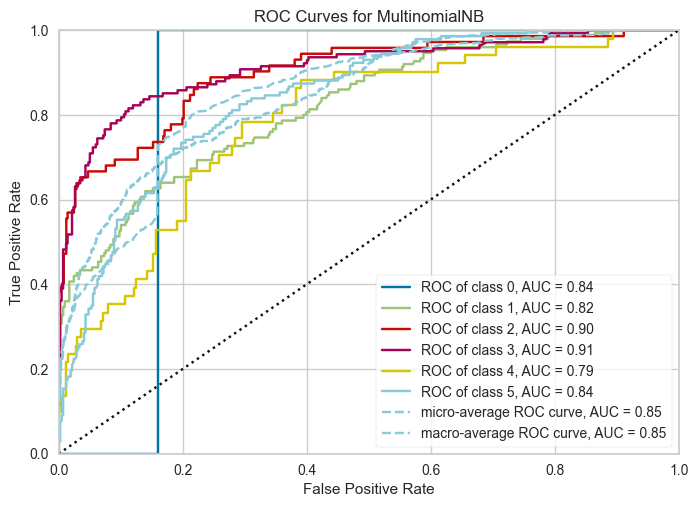

<AxesSubplot: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:
visualizer = ROCAUC(mnb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## LogisticRegression

In [46]:
log = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("mul", LogisticRegression())])

In [47]:
log.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('mul', LogisticRegression())])

In [48]:
y_pred = log.predict(X_test)

In [49]:
print(f"accuracy_score = {accuracy_score(y_pred, y_test)}")
print("classification_report:" + classification_report(y_pred, y_test))

accuracy_score = 0.6989247311827957
classification_report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.65      0.66       154
           2       0.72      0.85      0.78        61
           3       0.87      0.66      0.75       185
           4       0.43      0.96      0.59        23
           5       0.66      0.70      0.68       135

    accuracy                           0.70       558
   macro avg       0.56      0.64      0.58       558
weighted avg       0.73      0.70      0.70       558



C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vbaza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


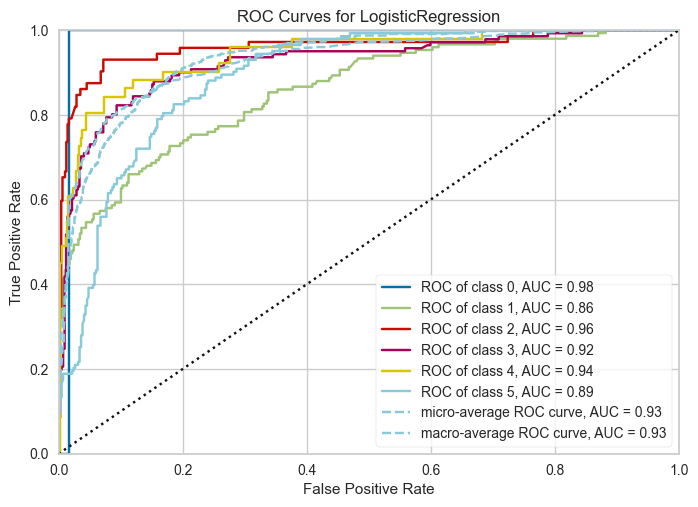

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
visualizer = ROCAUC(log)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

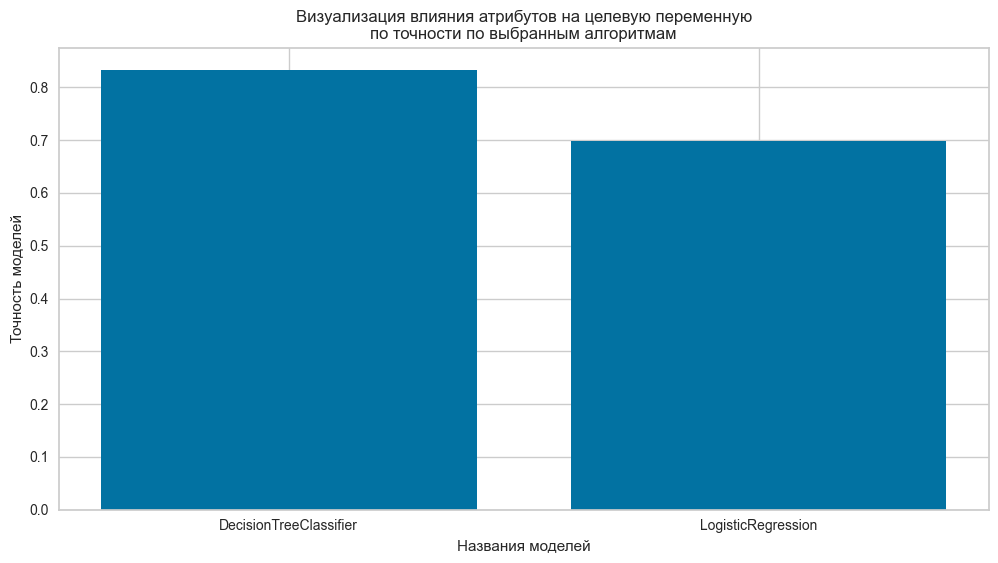

In [51]:
x = ('DecisionTreeClassifier', '', 'LogisticRegression')
y = (accuracy_score(dtc.predict(X_test), y_test), accuracy_score(log.predict(X_test), y_test))

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('Визуализация влияния атрибутов на целевую переменную\nпо точности по выбранным алгоритмам')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax.set_ylabel('Точность моделей')
ax.set_xlabel('Названия моделей')
plt.show()

### Выбор модели классификации

Как самая точная модель себя показала `DecisionTreeClassifier` её мы и будем использовать в дальнейшем для оптимизации. Точность данной модели составляет - 0.85

# 2.2 Оптимизация модели

In [93]:
best_max_depth = 0
best_accuracy = 0
for i in range(1,20):
    dtc = Pipeline([("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("dtc", DecisionTreeClassifier(random_state=0, max_depth=i))])
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    f1 = (accuracy_score(y_pred, y_test))
    if f1 > best_accuracy:
        best_accuracy = f1
        best_max_depth = i
print("Лучший параметр максимальной глубины = " + str(best_max_depth))

Лучший параметр максимальной глубины = 6


In [94]:
dtc = Pipeline([("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("dtc", DecisionTreeClassifier(random_state=0, max_depth=best_max_depth))])

In [95]:
dtc.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('dtc', DecisionTreeClassifier(max_depth=6, random_state=0))])

In [96]:
y_pred = dtc.predict(X_test)

In [97]:
print(f"accuracy_score = {accuracy_score(y_pred, y_test)}")
print("classification_report:" + classification_report(y_pred, y_test))

accuracy_score = 0.8655913978494624
classification_report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      0.76      0.81       174
           2       0.79      0.98      0.88        58
           3       0.92      0.90      0.91       144
           4       0.90      0.98      0.94        47
           5       0.83      0.91      0.86       130

    accuracy                           0.87       558
   macro avg       0.72      0.76      0.73       558
weighted avg       0.86      0.87      0.86       558



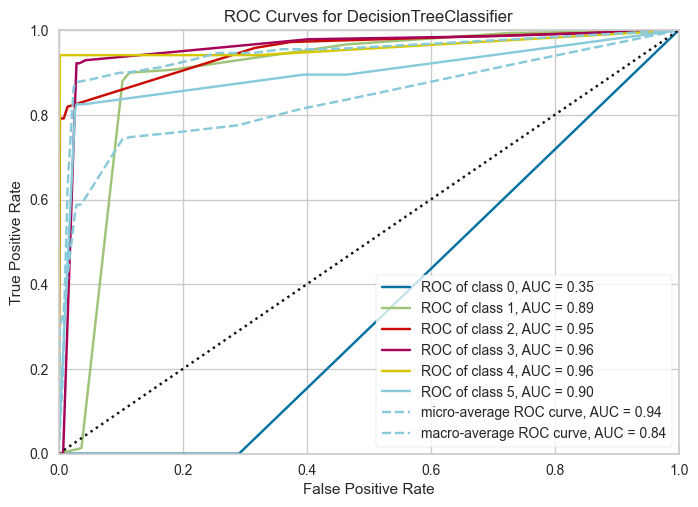

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [98]:
visualizer = ROCAUC(dtc)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Модель не смогла захватить все особенности данных и не была предоставлена возможность научиться сбалансировать степень свободы и ограничений, необходимых для создания оптимальной модели. Это произошло, когда модель слишком проста и не имеет достаточного количества параметров для достижения высокой точности. В таком случае модель не будет способна находить закономерности в данных и получать высокую точность на тестовых данных.

Недообучение может быть улучшено путем выбора более сложной модели или увеличения количества существенных параметров для модели, а также дополнительного анализа признаков и обучающих данных.

## Сохранение модели

In [99]:
import joblib

In [100]:
joblib.dump(dtc, "model.pkl")

['model.pkl']

# Отчет о проделанной работе

1. Разбиение выборки на обучающую и тестовую
2. Создание списка номинаций
3. Обучение модели методом классификации DecisionTreeClassifier
4. Обучение модели методом MultinomialNB
5. Обучение модели методом логистической регрессии
Разбиение выборки и выполнение оценки моделей классификации DecisionTreeClassifier, MultinomialNB и логистической регрессии показало что `DecisionTreeClassifier` имеет лучшее качество. Для дальнейшей работы я выбрал модель `DecisionTreeClassifier` ,так как она показывает наилучшие результаты.

6. Настройка гиперпараметров
После настройки гиперпараметров результаты изменились в лучшую сторону, теперь accuracy score составляет 0.87.

7. Построение кривых валидаций и обучений
8. Сохранение модели
В итоге была получена модель, которая может прогнозировать номинацию по тексту статьи.